# Predicitng Housing Prices with Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print('Data:', df.shape)

Data: (545, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.select_dtypes(include='int')

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [6]:
var = df.select_dtypes(include='object')
var

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


### Data Cleaning & Transformation

In [7]:
df.dropna(inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
var

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [10]:
df['mainroad'].replace('yes',1,inplace=True)
df['mainroad'].replace('no',0, inplace=True)
df['guestroom'].replace('yes',1,inplace=True)
df['guestroom'].replace('no',0,inplace=True)
df['basement'].replace('yes',1,inplace=True)
df['basement'].replace('no',0,inplace=True)
df['hotwaterheating'].replace('no',0,inplace=True)
df['hotwaterheating'].replace('yes',1,inplace=True)
df['airconditioning'].replace('no',0,inplace=True)
df['airconditioning'].replace('yes',1,inplace=True)
df['prefarea'].replace('no',0,inplace=True)
df['prefarea'].replace('yes',1,inplace=True)

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [12]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [13]:
df['furnishingstatus'].replace('furnished',1, inplace=True)
df['furnishingstatus'].replace('semi-furnished',0.5, inplace=True)
df['furnishingstatus'].replace('unfurnished',0, inplace=True)

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [15]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [16]:
df['price'] = pd.to_numeric(df['price'].replace({'\$': '', ',': ''}))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


Now the train data is perfect for a machine learning algorithm:

All the data is numeric
everything is concatenated together

In [18]:
df.shape

(545, 13)

### Getting Model Ready

Now that we've explored the data, it is time to get these features 'model ready'.

In [19]:
# x contains the training data or model input that are also called Feature Variables.

x = df.drop('price', axis=1)

# y is called the Target Variable because this is the column we want to predict.

y = df['price']

In [20]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [21]:
x_transform.shape

(545, 12)

In [22]:
x_transform

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113,  1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469,  1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203]])

In [23]:
y.shape

(545,)

In [24]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101) 

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

### Model Testing

In [27]:
y_predict = lin_reg.predict(x_test)
print(y_predict.shape)

(55,)


In [28]:
print(y_predict)

[5192354.85571342 6473340.72143371 4981755.59326871 4855484.73767659
 4501768.40003897 3559196.90113806 7156376.26949874 3372278.78126005
 5021286.59598158 5505425.09500195 4815265.88440085 7462658.3287731
 4420437.46826284 4430633.96094873 6295169.80150444 5570551.69602653
 5301442.38310395 6807420.9181873  2679943.07708127 3434199.234491
 5003923.61532366 4895912.74080983 5973403.15038901 5724282.3922755
 3573649.20567388 4035019.60736045 2688406.78785514 4294999.13728545
 3264045.08666943 4942646.17382029 6549226.13604277 3192674.4683906
 6755138.66525721 2668612.36872483 6263532.69894488 2956654.18838846
 4649260.19784167 7336410.60804151 3677296.01447449 2669971.50550264
 4375755.0364151  6683173.75025841 5133857.68313625 5761716.82087822
 3103399.37055094 2831926.70445807 5677341.12120425 3962758.89867189
 6879931.46509336 2689642.84098571 4543922.77978504 4934801.91141443
 7466043.41310795 3604131.69070934 4804634.26566074]


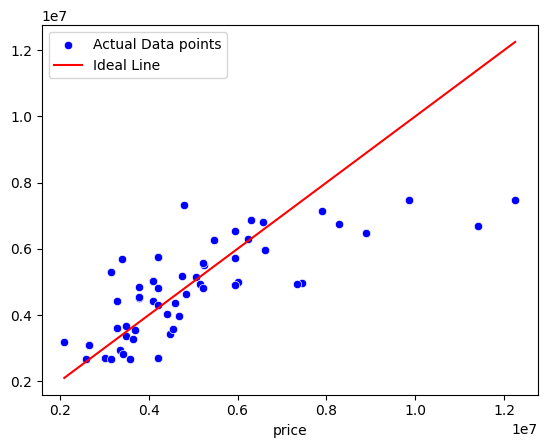

In [29]:
sns.scatterplot(x=y_test, y=y_predict, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [30]:
results = np.column_stack((y_test, y_predict))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    4753000.00 |    5192354.86
    8890000.00 |    6473340.72
    7455000.00 |    4981755.59
    3773000.00 |    4855484.74
    3780000.00 |    4501768.40
    3703000.00 |    3559196.90
    7910000.00 |    7156376.27
    3500000.00 |    3372278.78
    4098500.00 |    5021286.60
    5250000.00 |    5505425.10
    4200000.00 |    4815265.88
    9870000.00 |    7462658.33
    3290000.00 |    4420437.47
    4095000.00 |    4430633.96
    6230000.00 |    6295169.80
    5229000.00 |    5570551.70
    3150000.00 |    5301442.38
    6580000.00 |    6807420.92
    3570000.00 |    2679943.08
    4473000.00 |    3434199.23
    6020000.00 |    5003923.62
    5950000.00 |    4895912.74
    6615000.00 |    5973403.15
    5950000.00 |    5724282.39
    4550000.00 |    3573649.21
    4403000.00 |    4035019.61
    3010000.00 |    2688406.79
    4200000.00 |    4294999.14
    3640000.00 |    3264045.09
    7350000.00 |    4942646.17
    5

In [31]:
# Residual Analysis
residual = actual - y_predict.reshape(-1)
print(residual)

[   22645.14428658 -1258340.72143371   233244.40673129   359515.26232341
   713231.59996103  1655803.09886194 -1941376.26949874  1842721.21873995
   193713.40401842  -290425.09500195   399734.11559915 -2247658.3287731
   794562.53173716   784366.03905127 -1080169.80150444  -355551.69602653
   -86442.38310395 -1592420.9181873   2535056.92291873  1780800.765509
   211076.38467634   319087.25919017  -758403.15038901  -509282.3922755
  1641350.79432612  1179980.39263955  2526593.21214486   920000.86271455
  1950954.91333057   272353.82617971 -1334226.13604277  2022325.5316094
 -1540138.66525721  2546387.63127517 -1048532.69894488  2258345.81161154
   565739.80215833 -2121410.60804151  1537703.98552551  2545028.49449736
   839244.9635849  -1468173.75025841    81142.31686375  -546716.82087822
  2111600.62944906  2383073.29554193  -462341.12120425  1252241.10132811
 -1664931.46509336  2525357.15901429   671077.22021496   280198.08858557
 -2251043.41310795  1610868.30929066   410365.73433926]


Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

<Axes: ylabel='Density'>

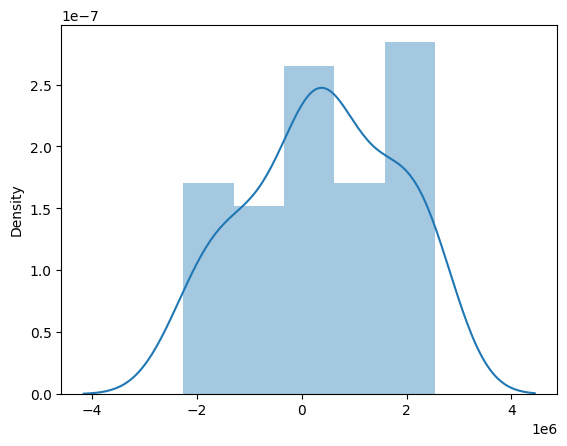

In [32]:
sns.distplot(residual, kde=True)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
remse = np.sqrt(mse)

print('Mean Squared Error:', {mse})
print('Root Mean Squared Error', {remse})

Mean Squared Error: {1970313163888.911}
Root Mean Squared Error {np.float64(1403678.4403448359)}


In [39]:
s = 1970313163888 - 1403678
print(s)

1970311760210


In [40]:
y_train.shape

(490,)

In [43]:
rs = r2_score(y_test, y_predict)
print(f'R-Squared: {rs:.2f} ')

R-Squared: 0.55 


##### The Model prediction is almost 55% correct and 45% incorrect. We can say the prediction level of the model is moderate. It's not bad and not good but still acceptable.
##### Because the house price prediction is a worthy area, other Regression models can be better than Linear Regression because of more accuracy.